In [6]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#  Load Dataset
df = pd.read_csv('../data/online_retail_ii.csv', encoding='ISO-8859-1')
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [2]:
# Basic info
df.info()

# Null values
df.isnull().sum()

# Preview missing customer IDs
df[df['Customer ID'].isnull()].sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
560210,539434,84792,ENCHANTED BIRD COATHANGER 5 HOOK,1,2010-12-17 14:41:00,9.32,NaN,United Kingdom
1040761,579777,20733,GOLD MINI TAPE MEASURE,2,2011-11-30 15:13:00,0.83,NaN,United Kingdom
688874,550542,84673B,BLUE FLY SWAT,1,2011-04-19 11:37:00,1.25,NaN,United Kingdom
82261,496936,21236,NaN,-6,2010-02-04 17:13:00,0.00,NaN,United Kingdom
263396,514835,84912A,PINK ROSE WASHBAG,1,2010-07-06 14:25:00,3.36,NaN,United Kingdom


In [3]:
# Drop rows with missing Customer ID or InvoiceNo
df.dropna(subset=['Customer ID', 'Invoice'], inplace=True)

# Drop negative quantities (usually returns)
df = df[df['Quantity'] > 0]

# Remove canceled transactions (Invoice starting with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C')]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['Price']

df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


Shape: (805620, 9)
Unique Customers: 5881
Date Range: 2009-12-01 07:45:00 → 2011-12-09 12:50:00


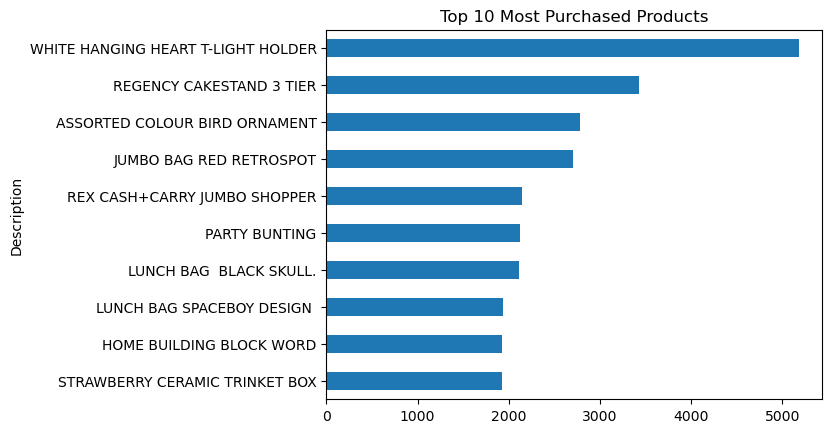

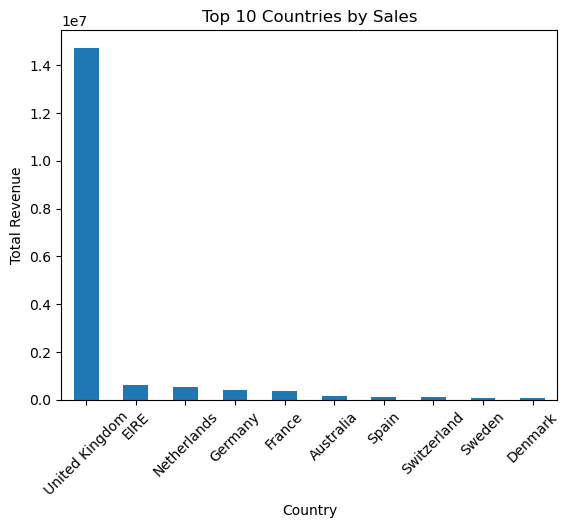

In [4]:
# Shape & unique customers
print(f"Shape: {df.shape}")
print(f"Unique Customers: {df['Customer ID'].nunique()}")
print(f"Date Range: {df['InvoiceDate'].min()} → {df['InvoiceDate'].max()}")

# Top 10 products
top_products = df['Description'].value_counts().head(10)
top_products.plot(kind='barh', title='Top 10 Most Purchased Products')
plt.gca().invert_yaxis()
plt.show()

# Sales distribution by country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', title='Top 10 Countries by Sales')
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


In [5]:
# Save for churn model & RFM
df.to_csv('../data/cleaned_retail.csv', index=False)
